C:\Users\kiran.franklin\AppData\Local\Temp\ipykernel_3368\931876375.py:70: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(im)


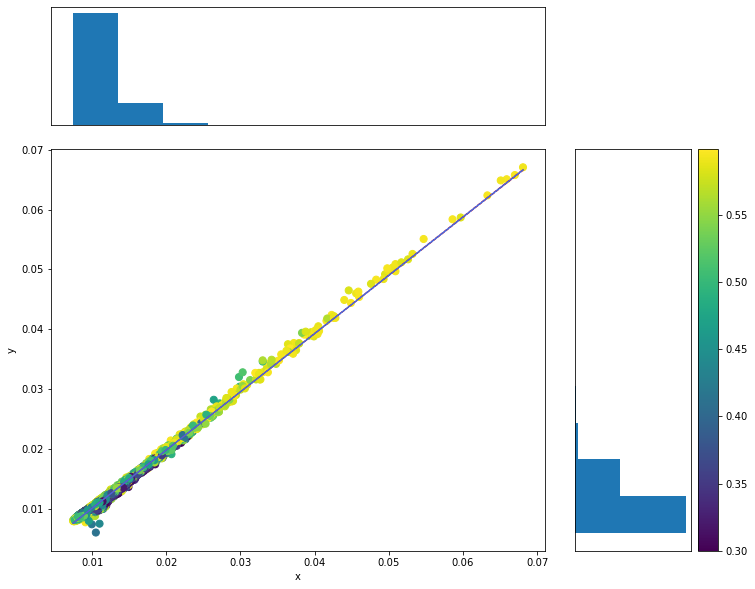

In [44]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import scipy.stats as stats
from scipy.stats import gaussian_kde
fig = plt.figure(figsize=(12,10))
gs = GridSpec(4, 4)

ax_scatter = fig.add_subplot(gs[1:4, 0:3])
ax_hist_x = fig.add_subplot(gs[0,0:3])
ax_hist_y = fig.add_subplot(gs[1:4, 3])
df = pd.read_csv("predicted_info.csv")
true_value=df['True_value']
predicted_value=df['Predicted_Value']
mac_number=df['Mach_No']
# true_value= df['sepal length (cm)']
# predicted_value= df['sepal width (cm)']

slope, intercept = np.polyfit(true_value, predicted_value, 1)

x_line = np.linspace(np.min(true_value), np.max(true_value), 100)
y_line = np.polyval([slope, intercept], x_line)


xy = np.vstack([true_value,mac_number])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
# idx = z.argsort()
# x, y, z = true_value[idx], predicted_value[idx], z[idx]

# fig, ax = plt.subplots()
im=ax_scatter.scatter(true_value, predicted_value, c=mac_number, s=50)
m, b = np.polyfit(true_value, predicted_value, deg=1)
x_mean = np.mean(true_value)
# plot fitted y = m*x + b
# ax_scatter.axline(xy1=(0, b), slope=m, color='r')


y_model = np.polyval([slope, intercept], true_value)   # modeling...

x_mean = np.mean(true_value)
y_mean = np.mean(predicted_value)
n = true_value.size                        # number of samples
m = 2                             # number of parameters
dof = n - m                       # degrees of freedom
t = stats.t.ppf(0.975, dof)       # Students statistic of interval confidence

residual = predicted_value - y_model

std_error = (np.sum(residual**2) / dof)**.5 
 
# confidence interval
ci = t * std_error * (1/n + (x_line - x_mean)**2 / np.sum((true_value - x_mean)**2))**.5
# predicting interval
pi = t * std_error * (1 + 1/n + (x_line - x_mean)**2 / np.sum((true_value - x_mean)**2))**.5  

# ax_scatter.fill_between(x_line, y_line + pi, y_line - pi, color = 'lightcyan', label = '95% prediction interval')
ax_scatter.fill_between(x_line, y_line + ci, y_line - ci,linestyle='--', facecolor="none", edgecolor="red", linewidth=1.0, label = '95 confidence interval')
ax_scatter.plot(x_line, y_line, color = 'royalblue')
# ax_scatter.scatter(df['sepal length (cm)'], df['sepal width (cm)'])
ax_scatter.set_xlabel('x')
ax_scatter.set_ylabel('y')
ax_hist_x.hist(true_value)
ax_hist_x.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
ax_hist_y.hist(predicted_value, orientation = 'horizontal')
ax_hist_y.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.colorbar(im)

plt.show()

In [8]:
xy

array([[0.0134 , 0.00923, 0.01   , ..., 0.0084 , 0.011  , 0.00811],
       [0.353  , 0.416  , 0.323  , ..., 0.509  , 0.477  , 0.503  ]])

c:\Users\kiran.franklin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


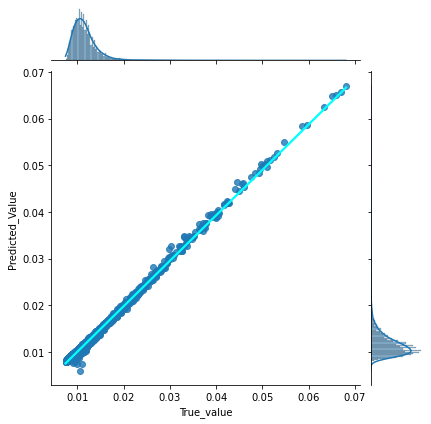

In [27]:
import seaborn as sns
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
ax=sns.jointplot('True_value','Predicted_Value',df,kind='reg',joint_kws={'line_kws':{'color':'cyan'}})
# ax.ax_marg_x.set_xlim(0, 0.1)

c:\Users\kiran.franklin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


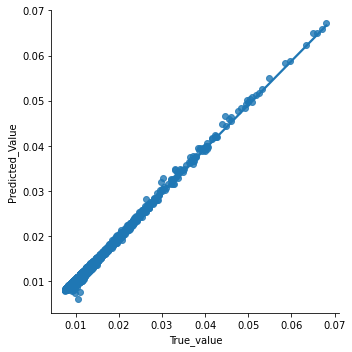

In [32]:
sns.lmplot('True_value','Predicted_Value',df,ci=90)